# Simple surfaces data set

In this notebook we create a data set of simple surfaces in $\mathbb{R}^3$

In [69]:
import numpy as np
import matplotlib as mpl
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import math
import gudhi as gd 
import scipy.special

# import the package fir 3d plotting
from mpl_toolkits.mplot3d import Axes3D

# make the plots interactive
# 



In [70]:
## plotting function for a surface in 3D 
def plot_surface(X,Y,Z):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    # change the view
    #ax.view_init(60, 35)
    ax.view_init(40, 60)
    plt.show()
    # plot the contour in a plot that I can rotate
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.contour3D(X, Y, Z, 50, cmap='viridis')
    ax.set_title('Contour plot')
    ax.view_init(60, 35)
    plt.show()
    
    return None
        

(100, 2)


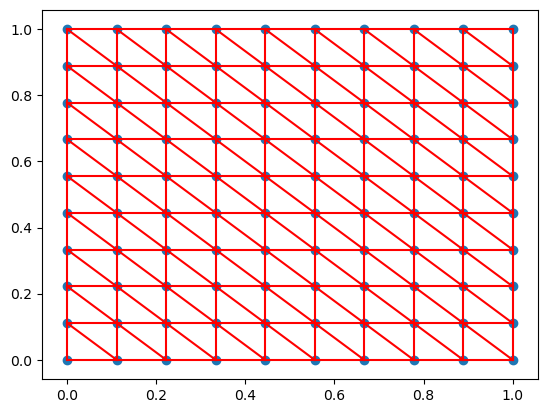

In [71]:
# subdivide unit square and return a single array of points
def unit_square_grid(n=3):
    x = np.linspace(0, 1, n)
    y = np.linspace(0, 1, n)
    X, Y = np.meshgrid(x, y)
    return np.array([X.flatten(), Y.flatten()]).T

## return the alpha complex of a unit square grid
def unit_square_grid_complex(n=3):
    pts = unit_square_grid(n)
    ac = gd.AlphaComplex(pts).create_simplex_tree()
    return ac

# plot and return the alpha complex of a unit square grid
def plot_unit_square_grid(n=3):
    pts = unit_square_grid(n)
    ac = gd.AlphaComplex(pts).create_simplex_tree()
    plt.scatter(pts[:,0], pts[:,1])

    for s in ac.get_skeleton(2):
        if len(s[0]) == 2: 
            plt.plot(pts[s[0], 0], pts[s[0], 1], 'r-')
    return pts, ac

pts, ac = plot_unit_square_grid(10)

print(pts.shape)

# 1. Surfaces such that $y \simeq z $

In [72]:
n = 4
eps = 0.1
x = np.sort(np.random.uniform(0, 100, n))
y = np.sort(np.random.uniform(0, 100, n))
Eps = np.random.uniform(-eps,eps, n)
EPS = np.meshgrid(Eps, Eps)
z = y + Eps
X, Y = np.meshgrid(x, y)
Z = Y + EPS

def random_surface_yz(n, eps = 0.1):

    x = np.sort(np.random.uniform(-10, 10, n))
    y = np.sort(np.random.uniform(-10, 10, n))
    Eps = np.random.uniform(-eps,eps, n)
    EPS = np.meshgrid(Eps, Eps)
    
    X, Y = np.meshgrid(x, y)
    Z = Y + Eps
    # return an array of points
    
    ar = np.array([X.flatten(), Y.flatten(), Z.flatten()]).T
    return X, Y, Z, ar

sx, sy, sz, s = random_surface_yz(4, 0.1)
print(s)

[[-8.03377826 -2.28674199 -2.36662066]
 [-4.79592829 -2.28674199 -2.23059817]
 [-0.53588398 -2.28674199 -2.33585979]
 [ 7.10609375 -2.28674199 -2.25707212]
 [-8.03377826  1.65491817  1.57503951]
 [-4.79592829  1.65491817  1.711062  ]
 [-0.53588398  1.65491817  1.60580038]
 [ 7.10609375  1.65491817  1.68458805]
 [-8.03377826  5.3650519   5.28517324]
 [-4.79592829  5.3650519   5.42119573]
 [-0.53588398  5.3650519   5.3159341 ]
 [ 7.10609375  5.3650519   5.39472177]
 [-8.03377826  6.7863346   6.70645594]
 [-4.79592829  6.7863346   6.84247843]
 [-0.53588398  6.7863346   6.7372168 ]
 [ 7.10609375  6.7863346   6.81600447]]


/Users/celiahacker/opt/anaconda3/envs/celia/lib/python3.7/site-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


Text(0.5, 0.92, 'Contour plot')

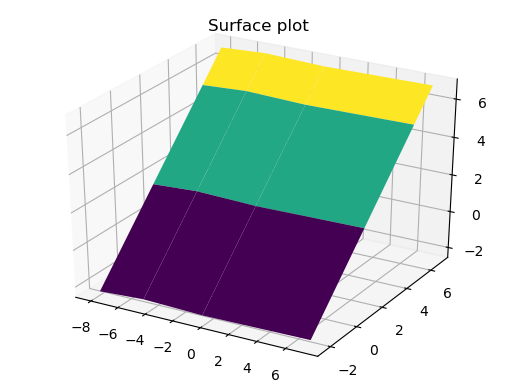

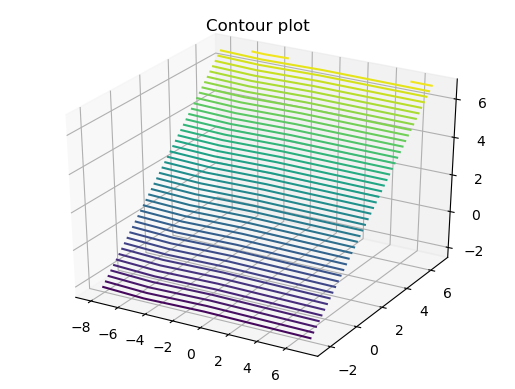

In [73]:
# plot the surface
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(sx, sy, sz, cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')

# plot the contour
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.contour3D(sx, sy, sz, 50, cmap='viridis')
ax.set_title('Contour plot')



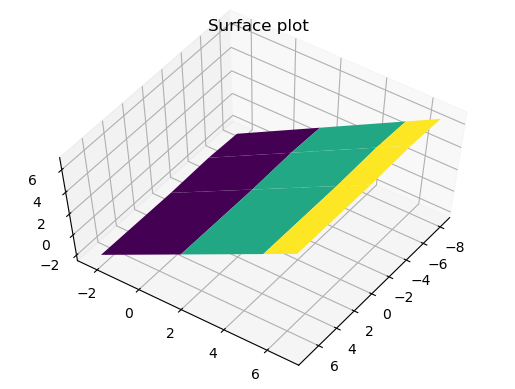

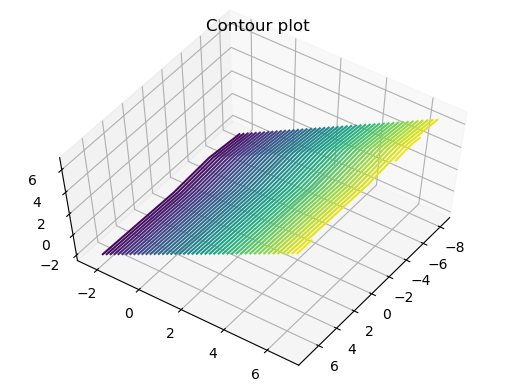

In [74]:
# plot the surface in a plot that I can rotate
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(sx, sy, sz, cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
ax.view_init(60, 35)

# plot the contour in a plot that I can rotate
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.contour3D(sx, sy, sz, 50, cmap='viridis')
ax.set_title('Contour plot')
ax.view_init(60, 35)


# 2. surfaces such that $z= x$

In [75]:
def random_surface_xz(n, eps = 0.1):

    x = np.sort(np.random.uniform(-10, 10, n))
    y = np.sort(np.random.uniform(-10, 10, n))
    Eps = np.random.uniform(-eps,eps, n)
    #EPS = np.meshgrid(Eps, Eps)
    print(y)
    
    X, Y = np.meshgrid(x, y)
    Z = X + Eps
    # return an array of points
    
    ar = np.array([X.flatten(), Y.flatten(), Z.flatten()]).T

    return X, Y, Z, ar


[-9.5591286   2.03211237  5.68426822  9.28718354]
[[-6.58706346 -9.5591286  -6.59348399]
 [ 3.93605701 -9.5591286   3.9104141 ]
 [ 6.4237686  -9.5591286   6.3666568 ]
 [ 9.1083124  -9.5591286   9.06455762]
 [-6.58706346  2.03211237 -6.59348399]
 [ 3.93605701  2.03211237  3.9104141 ]
 [ 6.4237686   2.03211237  6.3666568 ]
 [ 9.1083124   2.03211237  9.06455762]
 [-6.58706346  5.68426822 -6.59348399]
 [ 3.93605701  5.68426822  3.9104141 ]
 [ 6.4237686   5.68426822  6.3666568 ]
 [ 9.1083124   5.68426822  9.06455762]
 [-6.58706346  9.28718354 -6.59348399]
 [ 3.93605701  9.28718354  3.9104141 ]
 [ 6.4237686   9.28718354  6.3666568 ]
 [ 9.1083124   9.28718354  9.06455762]]


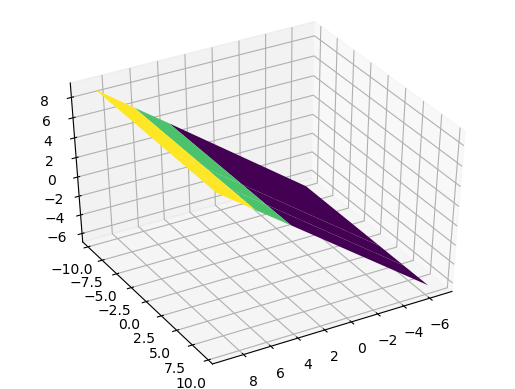

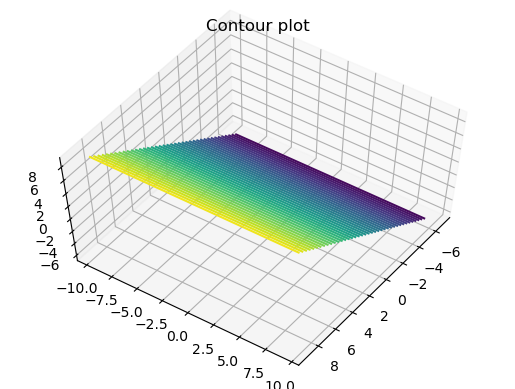

In [76]:

sx, sy, sz, sar = random_surface_xz(4, 0.1)
print(sar)

# plot the surface
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(sx, sy, sz, cmap='viridis', edgecolor='none')
# change the view
#ax.view_init(60, 35)
ax.view_init(40, 60)
plt.show()
# plot the contour in a plot that I can rotate
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.contour3D(sx, sy, sz, 50, cmap='viridis')
ax.set_title('Contour plot')
ax.view_init(60, 35)
plt.show()

## 3. surfaces a bit spherical 

In [77]:
def random_curved_surface(n, eps = 0.1): 

    x = np.sort(np.random.uniform(-10, 10, n))
    y = np.sort(np.random.uniform(-10, 10, n))
    X, Y = np.meshgrid(x, y)

    Eps = np.random.uniform(-eps,eps, n)
    EPS = np.meshgrid(Eps, Eps)
    Z = X**2 + Y**2 + Eps 

    ar = np.array([X.flatten(), Y.flatten(), Z.flatten()]).T
    return X, Y, Z, ar
    
sx, sy, sz, sar = random_curved_surface(10, 0.1) 

[[ -8.68375502  -8.7503799  151.89600174]
 [ -6.78405695  -8.7503799  122.52845113]
 [ -4.26308226  -8.7503799   94.6913035 ]
 [ -3.15075833  -8.7503799   86.42624281]
 [ -0.7907962   -8.7503799   77.17044111]
 [  5.18967345  -8.7503799  103.53278983]
 [  5.2862557   -8.7503799  104.48835155]
 [  6.16736308  -8.7503799  114.58053047]
 [  6.28467122  -8.7503799  116.02110902]
 [  8.44365907  -8.7503799  147.8548401 ]
 [ -8.68375502  -6.12187026 112.80414875]
 [ -6.78405695  -6.12187026  83.43659813]
 [ -4.26308226  -6.12187026  55.59945051]
 [ -3.15075833  -6.12187026  47.33438982]
 [ -0.7907962   -6.12187026  38.07858812]
 [  5.18967345  -6.12187026  64.44093684]
 [  5.2862557   -6.12187026  65.39649856]
 [  6.16736308  -6.12187026  75.48867748]
 [  6.28467122  -6.12187026  76.92925603]
 [  8.44365907  -6.12187026 108.76298711]
 [ -8.68375502  -2.99690425  84.30828842]
 [ -6.78405695  -2.99690425  54.94073781]
 [ -4.26308226  -2.99690425  27.10359018]
 [ -3.15075833  -2.99690425  18.83

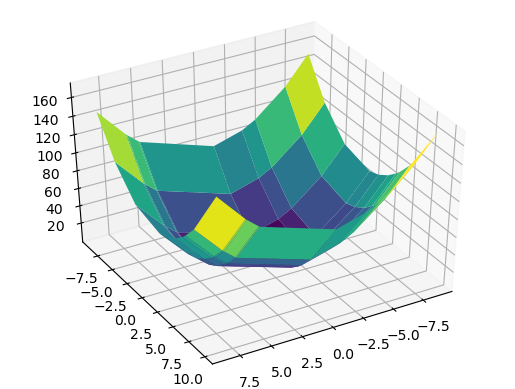

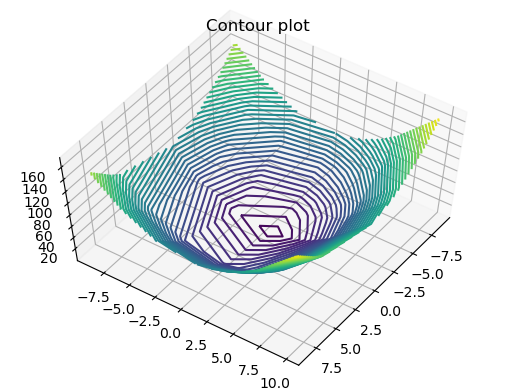

In [78]:
sx, sy, sz, sar = random_curved_surface(10, 0.1)
print(sar)

# plot the surface
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(sx, sy, sz, cmap='viridis', edgecolor='none')
# change the view
#ax.view_init(60, 35)
ax.view_init(40, 60)
plt.show()
# plot the contour in a plot that I can rotate
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.contour3D(sx, sy, sz, 50, cmap='viridis')
ax.set_title('Contour plot')
ax.view_init(60, 35)
plt.show()



## Generate a lot of data points 

In [79]:
def generate_surfaces_yz(num_surf, n_pts , eps): 
    surfaces = []
    for i in range(num_surf):
        surfaces.append(random_surface_yz(n_pts, eps))

    return surfaces

def generate_surfaces_xz(num_surf, n_pts , eps):
    surfaces = []
    for i in range(num_surf):
        surfaces.append(random_surface_xz(n_pts, eps))

    return surfaces

def generate_curved_surfaces(num_surf, n_pts , eps):
    surfaces = []
    for i in range(num_surf):
        surfaces.append(random_curved_surface(n_pts, eps))

    return surfaces



In [62]:
surfaces = generate_surfaces_yz(10, 10, 0.1)
print(len(surfaces))

10
